# **BÁO CÁO GIỮA KỲ PHÂN TÍCH DỮ LIỆU BẰNG PYTHON: TIỀN XỬ LÝ DỮ LIỆU**

# **Bước 1: Thu thập dữ liệu**

- Tên bộ dữ liệu: Housing Prices Dataset

- Bộ dữ liệu gồm 13 cột và 545 dòng chứa thông tin về các ngôi nhà, bao gồm nhiều đặc điểm khác nhau như diện tích, số phòng, và giá bán...Đây là một tập dữ liệu hữu ích để nghiên cứu các yếu tố ảnh hưởng đến giá nhà và áp dụng các mô hình dự báo giá bất động sản.


# **Bước 2: Thống kê mô tả về dữ liệu**

**1. Import Libraries**

In [ ]:
# ============================
# 1. Thư viện xử lý dữ liệu
# ============================
import pandas as pd  # Xử lý dữ liệu dạng bảng (DataFrame)
import numpy as np   # Hỗ trợ tính toán số học và xử lý mảng

# ============================
# 2. Thư viện trực quan hóa
# ============================
import matplotlib.pyplot as plt  # Vẽ biểu đồ cơ bản
import seaborn as sns           # Vẽ biểu đồ nâng cao, trực quan hơn

# ============================
# 3. Tắt cảnh báo không cần thiết
# ============================
import warnings
warnings.filterwarnings('ignore')

# ============================
# 4. Xử lý dữ liệu thiếu và chuẩn hóa
# ============================
from sklearn.impute import KNNImputer                 # Điền giá trị thiếu bằng KNN
from sklearn.experimental import enable_iterative_imputer  # Kích hoạt IterativeImputer (phiên bản thử nghiệm)
from sklearn.impute import IterativeImputer          # Điền giá trị thiếu lặp bằng mô hình học máy
from sklearn.preprocessing import (
    OrdinalEncoder,                                  # Mã hóa thứ tự cho biến phân loại
    PowerTransformer,                                # Biến đổi dữ liệu để chuẩn hóa phân phối
    StandardScaler, MinMaxScaler, RobustScaler       # Các phương pháp chuẩn hóa dữ liệu
)

# ============================
# 5. Mô hình học máy
# ============================
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # Mô hình rừng ngẫu nhiên dùng cho hồi quy và phân loại
from sklearn.linear_model import LinearRegression                            # Hồi quy tuyến tính
from sklearn.decomposition import PCA                                        # Giảm chiều dữ liệu bằng PCA
from sklearn.model_selection import train_test_split                        # Chia dữ liệu thành tập train và test

# ============================
# 6. Đánh giá mô hình
# ============================
from sklearn.metrics import (
    mean_absolute_error,    # Sai số tuyệt đối trung bình
    mean_squared_error,     # Sai số bình phương trung bình
    r2_score                # Hệ số xác định R^2
)

# ============================
# 7. Phân tích thống kê
# ============================
from scipy.stats import shapiro, probplot  # Kiểm định phân phối chuẩn và biểu đồ xác suất
from scipy import stats                    # Các hàm thống kê bổ sung
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Kiểm tra đa cộng tuyến (VIF)


**2. Load and Explore Data**

In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Housing.csv')
# Xem trước 5 dòng dữ liệu
print('Bộ dữ liệu gồm',df.shape[0],'hàng và',df.shape[1],'cột.')
df.head()

Bộ dữ liệu gồm 545 hàng và 13 cột.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000.0,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000.0,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000.0,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000.0,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
#Thống kê mô tả cơ bản
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             530 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          544 non-null    float64
 3   bathrooms         542 non-null    float64
 4   stories           540 non-null    float64
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          536 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   535 non-null    object 
 10  parking           536 non-null    float64
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 55.5+ KB


In [ ]:
#Thống kê mô tả cho các biến số
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.300000e+02,545.000000,544.000000,542.000000,540.000000,536.000000
mean,4.730506e+06,5150.541284,2.963235,1.284133,1.803704,0.697761
std,1.860027e+06,2170.141023,0.737405,0.501833,0.871304,0.861467
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.273500e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#Thống kê mô tả cho các biến phân loại
df.select_dtypes(include=['object']).describe()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,536,545,535,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,349,520,364,417,227


In [ ]:
# Tính số lượng null và phần trăm null
null_count = df.isnull().sum()  # Số lượng giá trị null
null_percentage = (null_count / len(df)) * 100  # Tỷ lệ %

# Tạo DataFrame hiển thị kết quả
null_summary = pd.DataFrame({
    'Column': null_count.index,   # Tên cột
    'Null Count': null_count.values,  # Số lượng giá trị null
    'Null Percentage': null_percentage.values  # Phần trăm giá trị null
})

# Sắp xếp theo số lượng null giảm dần
null_summary = null_summary.sort_values(by="Null Count", ascending=False)

# In kết quả
print(null_summary)

              Column  Null Count  Null Percentage
0              price          15         2.752294
9    airconditioning          10         1.834862
7           basement           9         1.651376
10           parking           9         1.651376
4            stories           5         0.917431
3          bathrooms           3         0.550459
2           bedrooms           1         0.183486
1               area           0         0.000000
5           mainroad           0         0.000000
8    hotwaterheating           0         0.000000
6          guestroom           0         0.000000
11          prefarea           0         0.000000
12  furnishingstatus           0         0.000000


**Nhận xét:** Không nên xóa các bản ghi có giá trị thiếu vì:

* Tỉ lệ missing thấp (hầu hết đều < 3%).

* Bộ dữ liệu không quá lớn, cần tận dụng tối đa dữ liệu để huấn luyện mô hình.

* Việc xóa có thể làm sai lệch phân phối và mất thông tin quan trọng.

**- Phân loại dữ liệu : Numeric, Catergorical**

In [ ]:
# Identify Data Types (Numeric/Categorical)
print("\nPhân loại dữ liệu:")
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print("Các biến số:", numerical_cols)
print("Các biến phân loại:", categorical_cols)


Phân loại dữ liệu:
Các biến số: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Các biến phân loại: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


**- Vẽ boxplot để tìm ngoại lai**

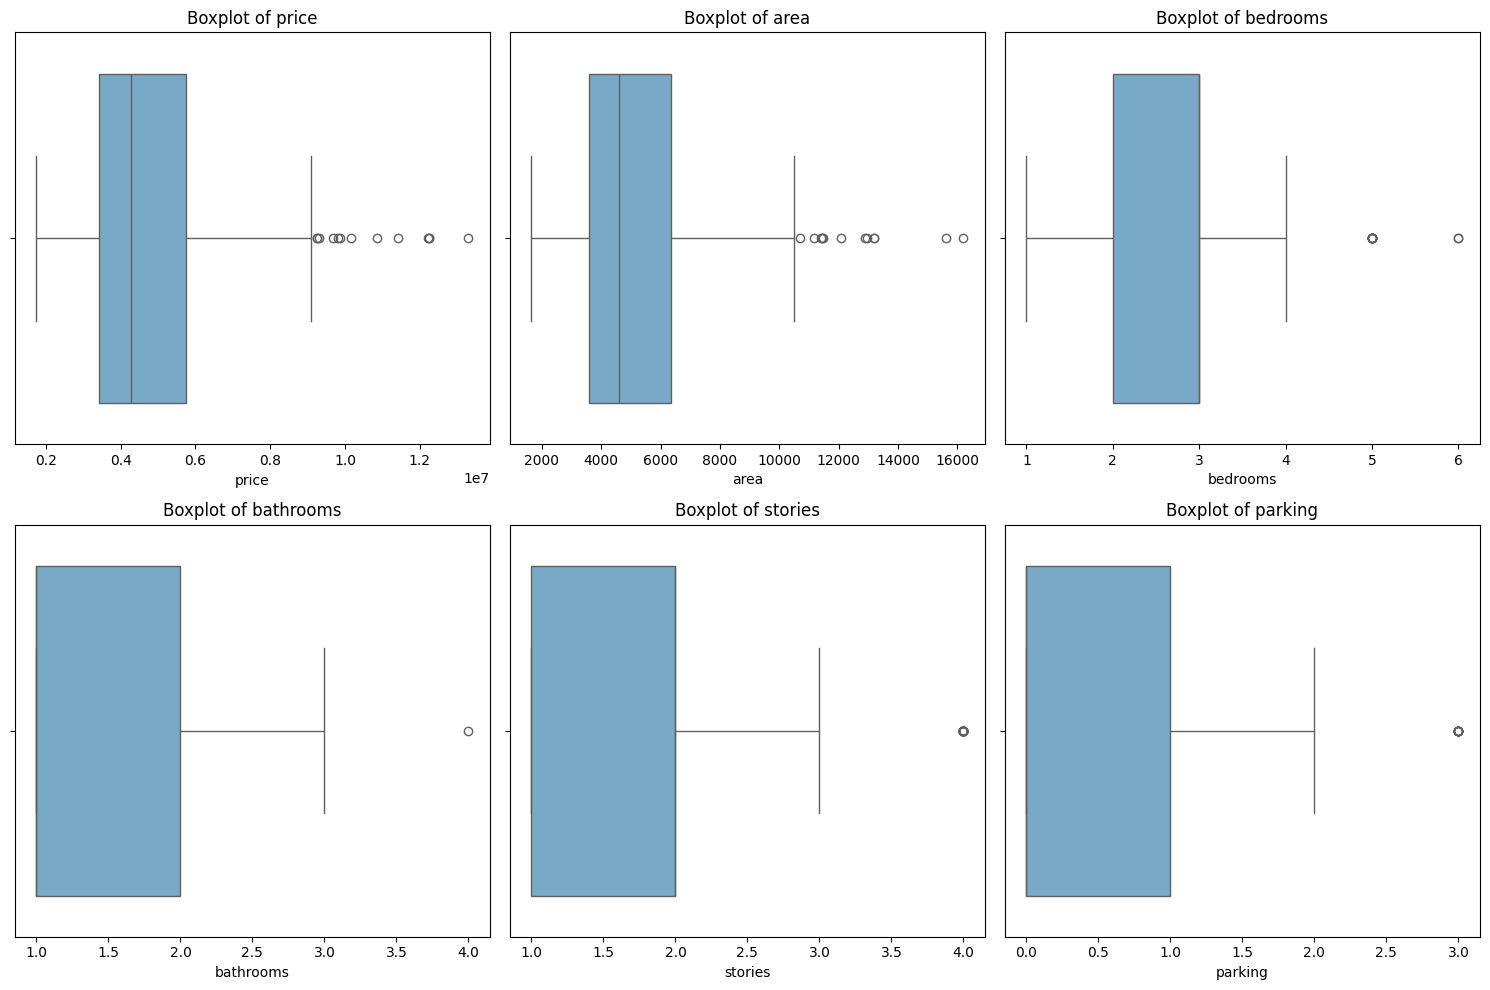

In [ ]:
# Tạo figure và các trục con (subplots)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Làm phẳng mảng axes để dễ lặp
axes = axes.flatten()

# Lặp qua các biến số để vẽ biểu đồ hộp (boxplot)
for i, feature in enumerate(numerical_cols):
    if feature in df.columns:

        sns.boxplot(data=df, x=feature, ax=axes[i], palette='Blues')
        axes[i].set_title(f'Boxplot of {feature}')

# Căn chỉnh lại bố cục để tránh bị chồng lấn
plt.tight_layout()
plt.show()

# **Bước 3: Làm sạch sữ liệu**

**3.1 Xử lý giá trị thiếu**

**🔹 1. price – Biến mục tiêu (Numerical)**

**Phương pháp: Regression Imputation**

Lý do chọn: price là biến mục tiêu (target), nên nó phụ thuộc vào các biến đầu vào như area, bedrooms, parking, v.v.

Nếu dùng mean hoặc median, ta sẽ làm giảm phương sai, làm méo phân phối và phá vỡ mối quan hệ đầu vào → đầu ra.

Regression Imputation giúp dự đoán có điều kiện theo thông tin thực tế từ các hàng không thiếu → chính xác và giữ tính logic.

**🔹 2. airconditioning, basement, prefarea – Categorical (thiếu 1.6–1.8%)**

** Phương pháp: Classification Imputation**

Đây là các biến nhị phân/nominal (Yes/No) mang tính "tiện nghi".

Có thể học được mối liên hệ giữa các đặc điểm như diện tích (area), số phòng (bedrooms) → xác suất có điều hòa, tầng hầm cao hơn.

Sử dụng mô hình phân loại như RandomForestClassifier sẽ cho dự đoán hợp lý hơn so với điền mode (giá trị phổ biến nhất).

**🔹 3. parking, stories, bathrooms, bedrooms – Numerical**

** Phương pháp: KNN Imputer**

Các biến này đều là biến số rời rạc, có tính tương quan với nhau và các biến khác (ví dụ: nhà lớn hơn thường có nhiều phòng tắm, nhiều chỗ đậu xe,…).

KNN Imputer dùng khoảng cách giữa các hàng đã chuẩn hóa để điền giá trị gần đúng → phù hợp với dữ liệu có quy luật nội tại.

Ưu điểm: Không giả định phân phối (non-parametric), xử lý tốt cả tương quan tuyến tính và phi tuyến.


In [ ]:


# === 1. Nhóm biến theo phương pháp xử lý ===
target_col = 'price'
num_knn_features = ['bedrooms', 'bathrooms', 'stories', 'parking']
cat_classify_features = ['airconditioning', 'basement', 'prefarea']
cat_no_missing = ['mainroad', 'guestroom', 'hotwaterheating', 'furnishingstatus']
num_no_missing = ['area']

# === 2. Xử lý các biến SỐ bằng KNN (trừ 'price') ===
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df[num_knn_features]),
                              columns=num_knn_features,
                              index=df.index)

# === 3. Encode categorical (gồm cả missing và không missing) ===
all_cat_features = cat_classify_features + cat_no_missing
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
df_cat_encoded = pd.DataFrame(encoder.fit_transform(df[all_cat_features]),
                              columns=all_cat_features,
                              index=df.index)

# === 4. Impute các biến phân loại thiếu bằng Classification Imputer (MICE + RF) ===
cat_imputer = IterativeImputer(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                               max_iter=10,
                               random_state=42)
df_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(df_cat_encoded),
                              columns=all_cat_features,
                              index=df.index)

# Làm tròn & chuyển về int để giải mã
df_cat_imputed = df_cat_imputed.round().astype(int)

# Giải mã về dạng nhãn ban đầu
df_cat_final = pd.DataFrame(encoder.inverse_transform(df_cat_imputed),
                            columns=all_cat_features,
                            index=df.index)

# === 5. Impute biến mục tiêu 'price' bằng Regression ===
# Tạo tập train/test dựa vào chỗ thiếu giá
train_idx = df['price'].notnull()
test_idx = df['price'].isnull()

# Tập đặc trưng dùng để dự đoán 'price'
features_for_price = num_knn_features + num_no_missing + all_cat_features
X_train = pd.concat([df_knn_imputed.loc[train_idx],
                     df[num_no_missing].loc[train_idx],
                     df_cat_imputed.loc[train_idx]], axis=1)
y_train = df.loc[train_idx, 'price']

X_test = pd.concat([df_knn_imputed.loc[test_idx],
                    df[num_no_missing].loc[test_idx],
                    df_cat_imputed.loc[test_idx]], axis=1)

# Hồi quy để dự đoán giá
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
predicted_prices = rf_reg.predict(X_test)

# Gộp lại với giá gốc
df_price_filled = df['price'].copy()
df_price_filled.loc[test_idx] = predicted_prices

# === 6. Tập hợp dữ liệu đầy đủ sau khi xử lý ===
df_missing = pd.concat([
    df_price_filled.rename('price'),
    df[num_no_missing],  # 'area'
    df_knn_imputed[num_knn_features],
    df_cat_final[all_cat_features]
], axis=1)

# === 7. Kiểm tra lần cuối ===
# Tính số lượng null và phần trăm null
null_count = df_missing.isnull().sum()  # Số lượng giá trị null
null_percentage = (null_count / len(df_missing)) * 100  # Tỷ lệ %

# Tạo DataFrame hiển thị kết quả
null_summary = pd.DataFrame({
    'Column': null_count.index,   # Tên cột
    'Null Count': null_count.values,  # Số lượng giá trị null
    'Null Percentage': null_percentage.values  # Phần trăm giá trị null
})

# Sắp xếp theo số lượng null giảm dần
null_summary = null_summary.sort_values(by="Null Count", ascending=False)

# In kết quả
print(null_summary)

              Column  Null Count  Null Percentage
0              price           0              0.0
1               area           0              0.0
2           bedrooms           0              0.0
3          bathrooms           0              0.0
4            stories           0              0.0
5            parking           0              0.0
6    airconditioning           0              0.0
7           basement           0              0.0
8           prefarea           0              0.0
9           mainroad           0              0.0
10         guestroom           0              0.0
11   hotwaterheating           0              0.0
12  furnishingstatus           0              0.0


**3.2 Kiểm tra giá trị trung lặp**

In [ ]:
num_duplicates = df_missing.duplicated().sum()
print(f"Có {num_duplicates} dòng trùng lặp")

Có 0 dòng trùng lặp


**3.3 Xử lý outliers**

Để kiểm tra phân phối chuẩn của các cột dữ liệu số trong df_missing, dùng:

Kiểm định Shapiro-Wilk (scipy.stats.shapiro) – tốt cho <5000 mẫu

Biểu đồ phân phối (Histogram + KDE hoặc Q-Q Plot)

▶ price: p-value = 0.0000 → Không phân phối chuẩn (bác bỏ H0)


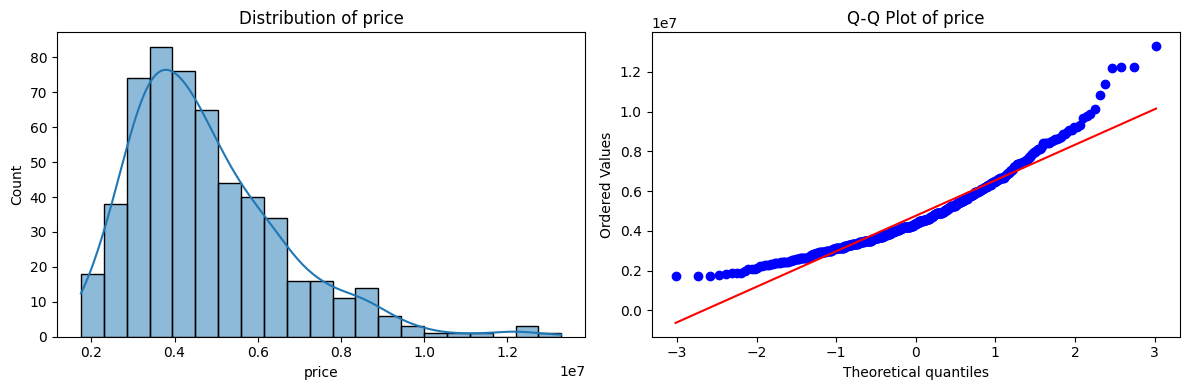

▶ area: p-value = 0.0000 → Không phân phối chuẩn (bác bỏ H0)


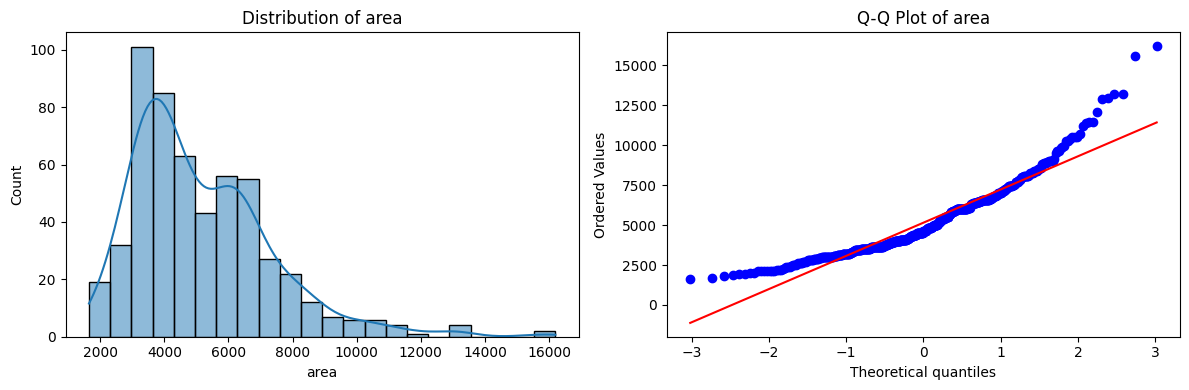

▶ bedrooms: p-value = 0.0000 → Không phân phối chuẩn (bác bỏ H0)


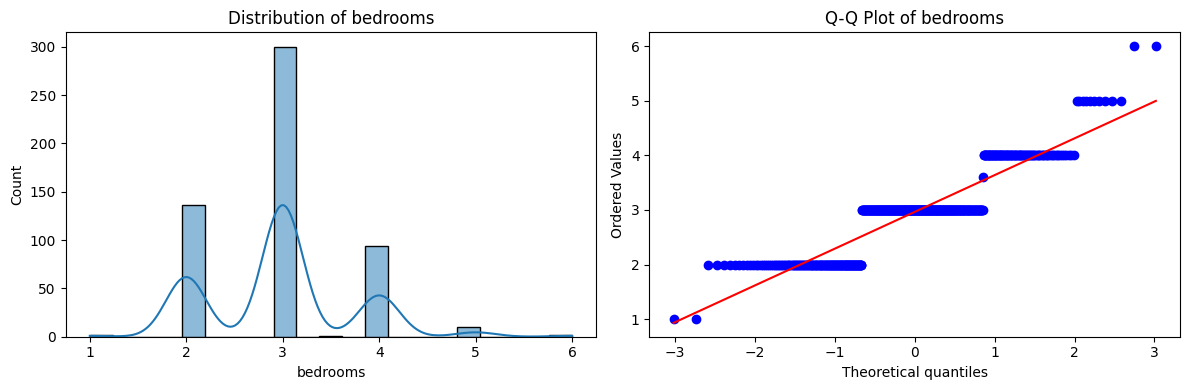

▶ bathrooms: p-value = 0.0000 → Không phân phối chuẩn (bác bỏ H0)


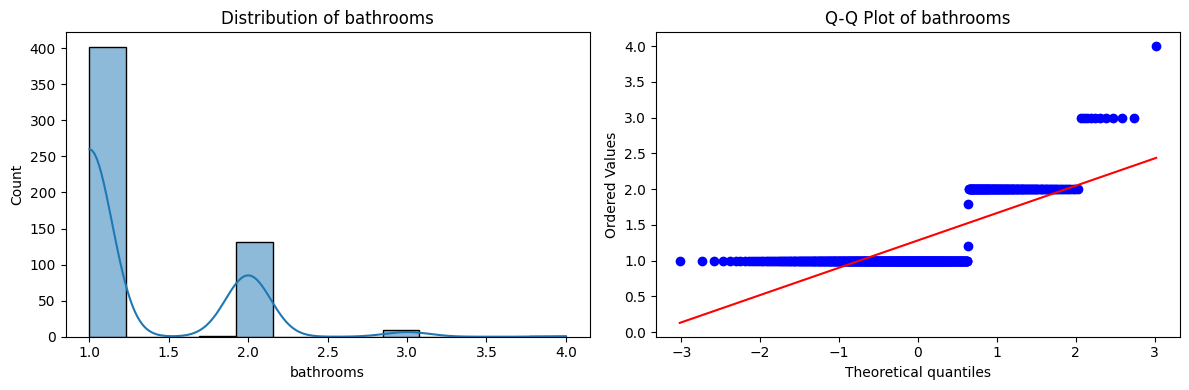

▶ stories: p-value = 0.0000 → Không phân phối chuẩn (bác bỏ H0)


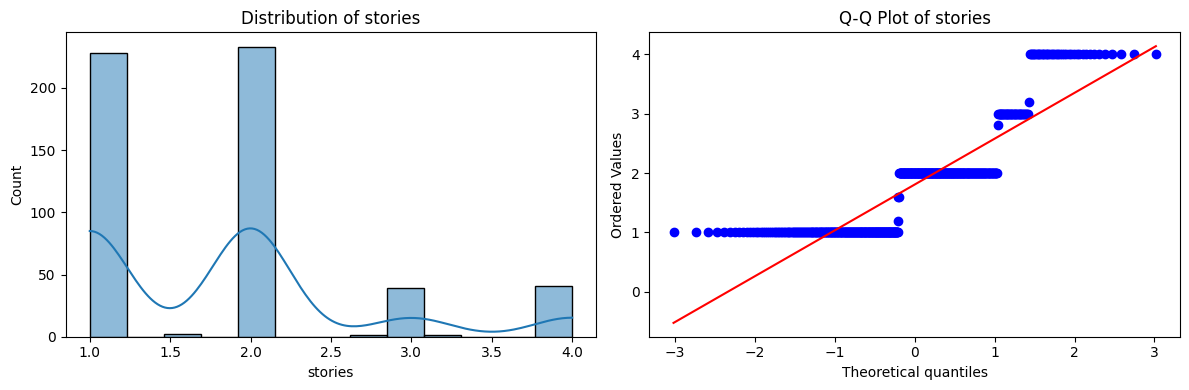

▶ parking: p-value = 0.0000 → Không phân phối chuẩn (bác bỏ H0)


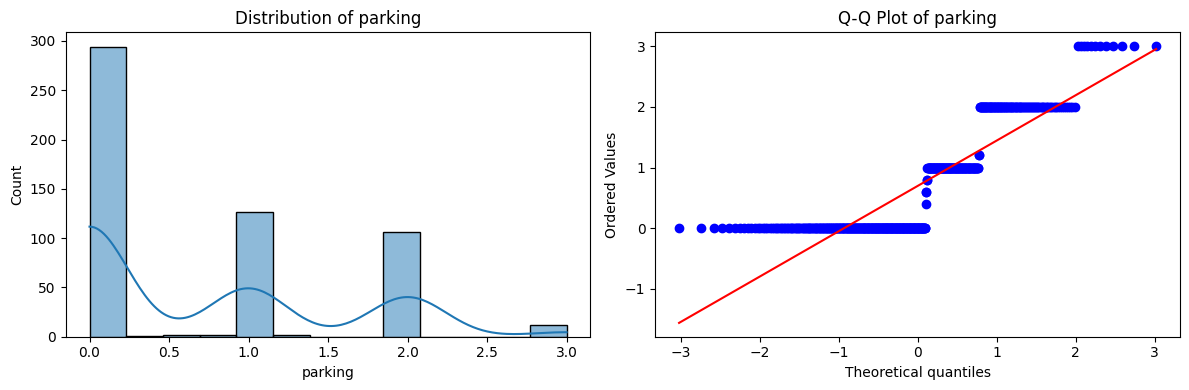

In [ ]:


# Vòng lặp kiểm định và trực quan
for col in numerical_cols:
    data = df_missing[col].dropna()

    # 1. Kiểm định Shapiro-Wilk
    stat, p = shapiro(data)
    print(f'▶ {col}: p-value = {p:.4f} →', end=' ')
    if p > 0.05:
        print("Phân phối có thể là chuẩn (không đủ bằng chứng bác bỏ H0)")
    else:
        print("Không phân phối chuẩn (bác bỏ H0)")

    # 2. Biểu đồ phân phối
    plt.figure(figsize=(12, 4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Distribution of {col}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()

 **Nhận xét:** Tất cả các cột số đều không phân phối chuẩn, việc xử lý outliers (giá trị ngoại lai) cần tránh dùng phương pháp dựa vào phân phối chuẩn như Z-score. Thay vào đó, nên dùng phương pháp phi tham số (non-parametric).

In [ ]:
# Hàm xử lý outliers bằng IQR clipping
def clip_outliers_iqr(df, columns):
    df_clipped = df_missing.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clipped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"[{col}] Clipped to range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    return df_clipped

# Áp dụng hàm lên df_missing (hoặc df_cleaned của bạn)
df_clipped = clip_outliers_iqr(df_missing, numerical_cols)

[price] Clipped to range: [-35000.00, 9205000.00]
[area] Clipped to range: [-540.00, 10500.00]
[bedrooms] Clipped to range: [0.50, 4.50]
[bathrooms] Clipped to range: [-0.50, 3.50]
[stories] Clipped to range: [-0.50, 3.50]
[parking] Clipped to range: [-1.50, 2.50]


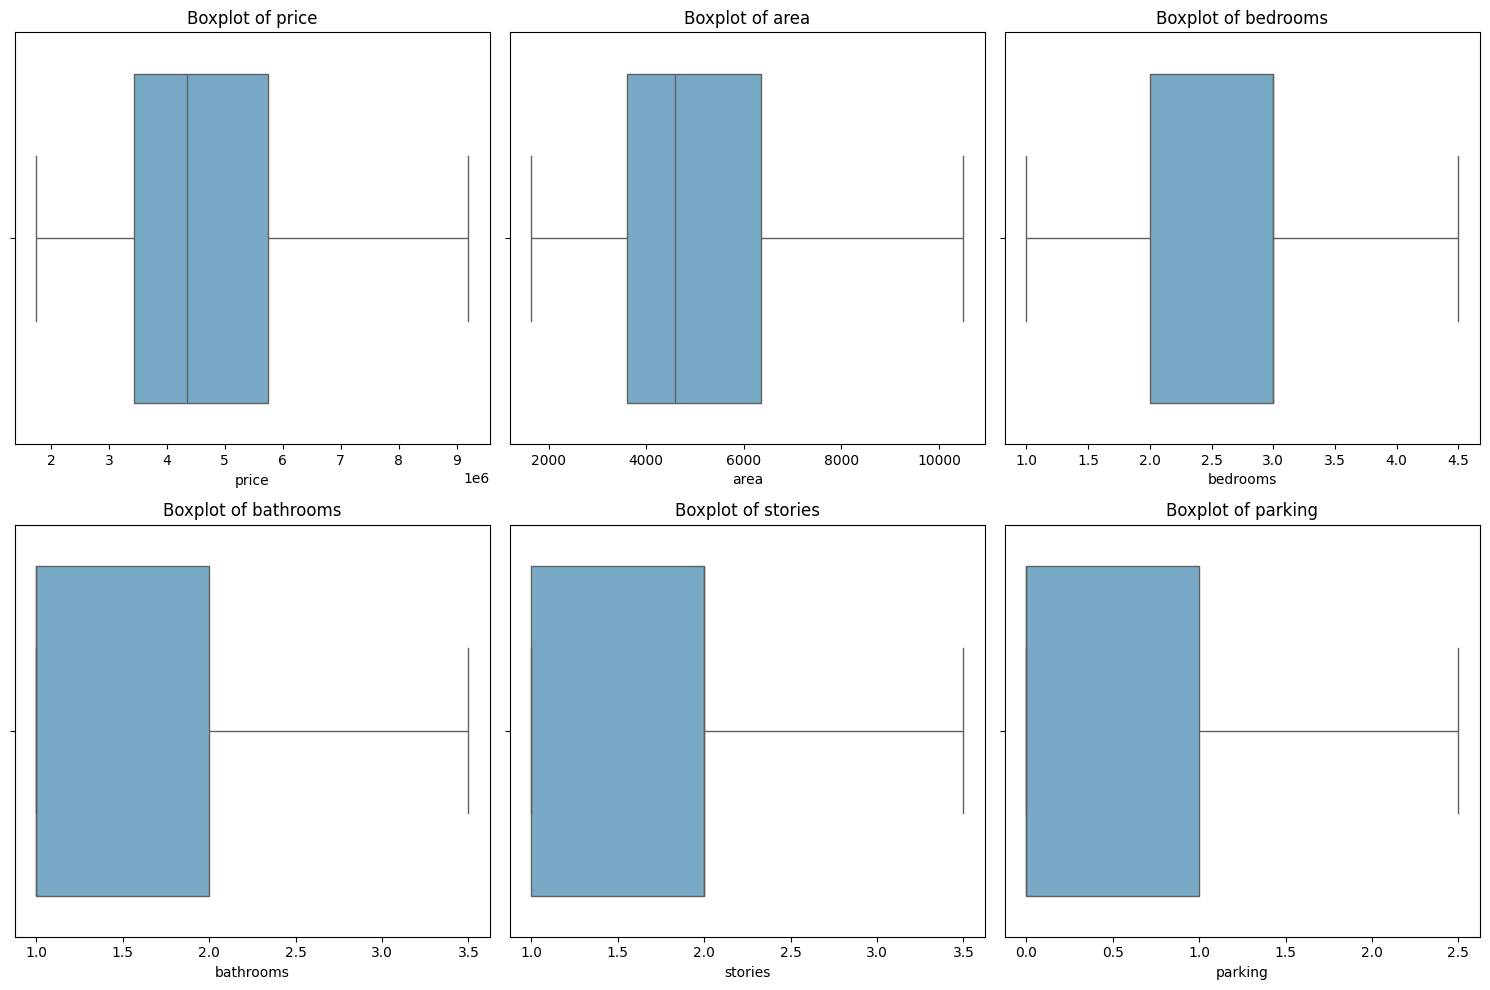

In [ ]:
# Tạo figure và các trục con (subplots)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Làm phẳng mảng axes để dễ lặp
axes = axes.flatten()

# Lặp qua các feature số và tạo boxplot
for i, feature in enumerate(numerical_cols):
    if feature in df_clipped.columns:
        # Vẽ boxplot cho dữ liệu đã xử lý, sử dụng palette 'Blues' với Seaborn
        sns.boxplot(data=df_clipped, x=feature, ax=axes[i], palette='Blues')
        axes[i].set_title(f'Boxplot of {feature}')

# Điều chỉnh layout để tránh chồng lấn
plt.tight_layout()
plt.show()

# **Bước 4: Trực quan hóa các biến**

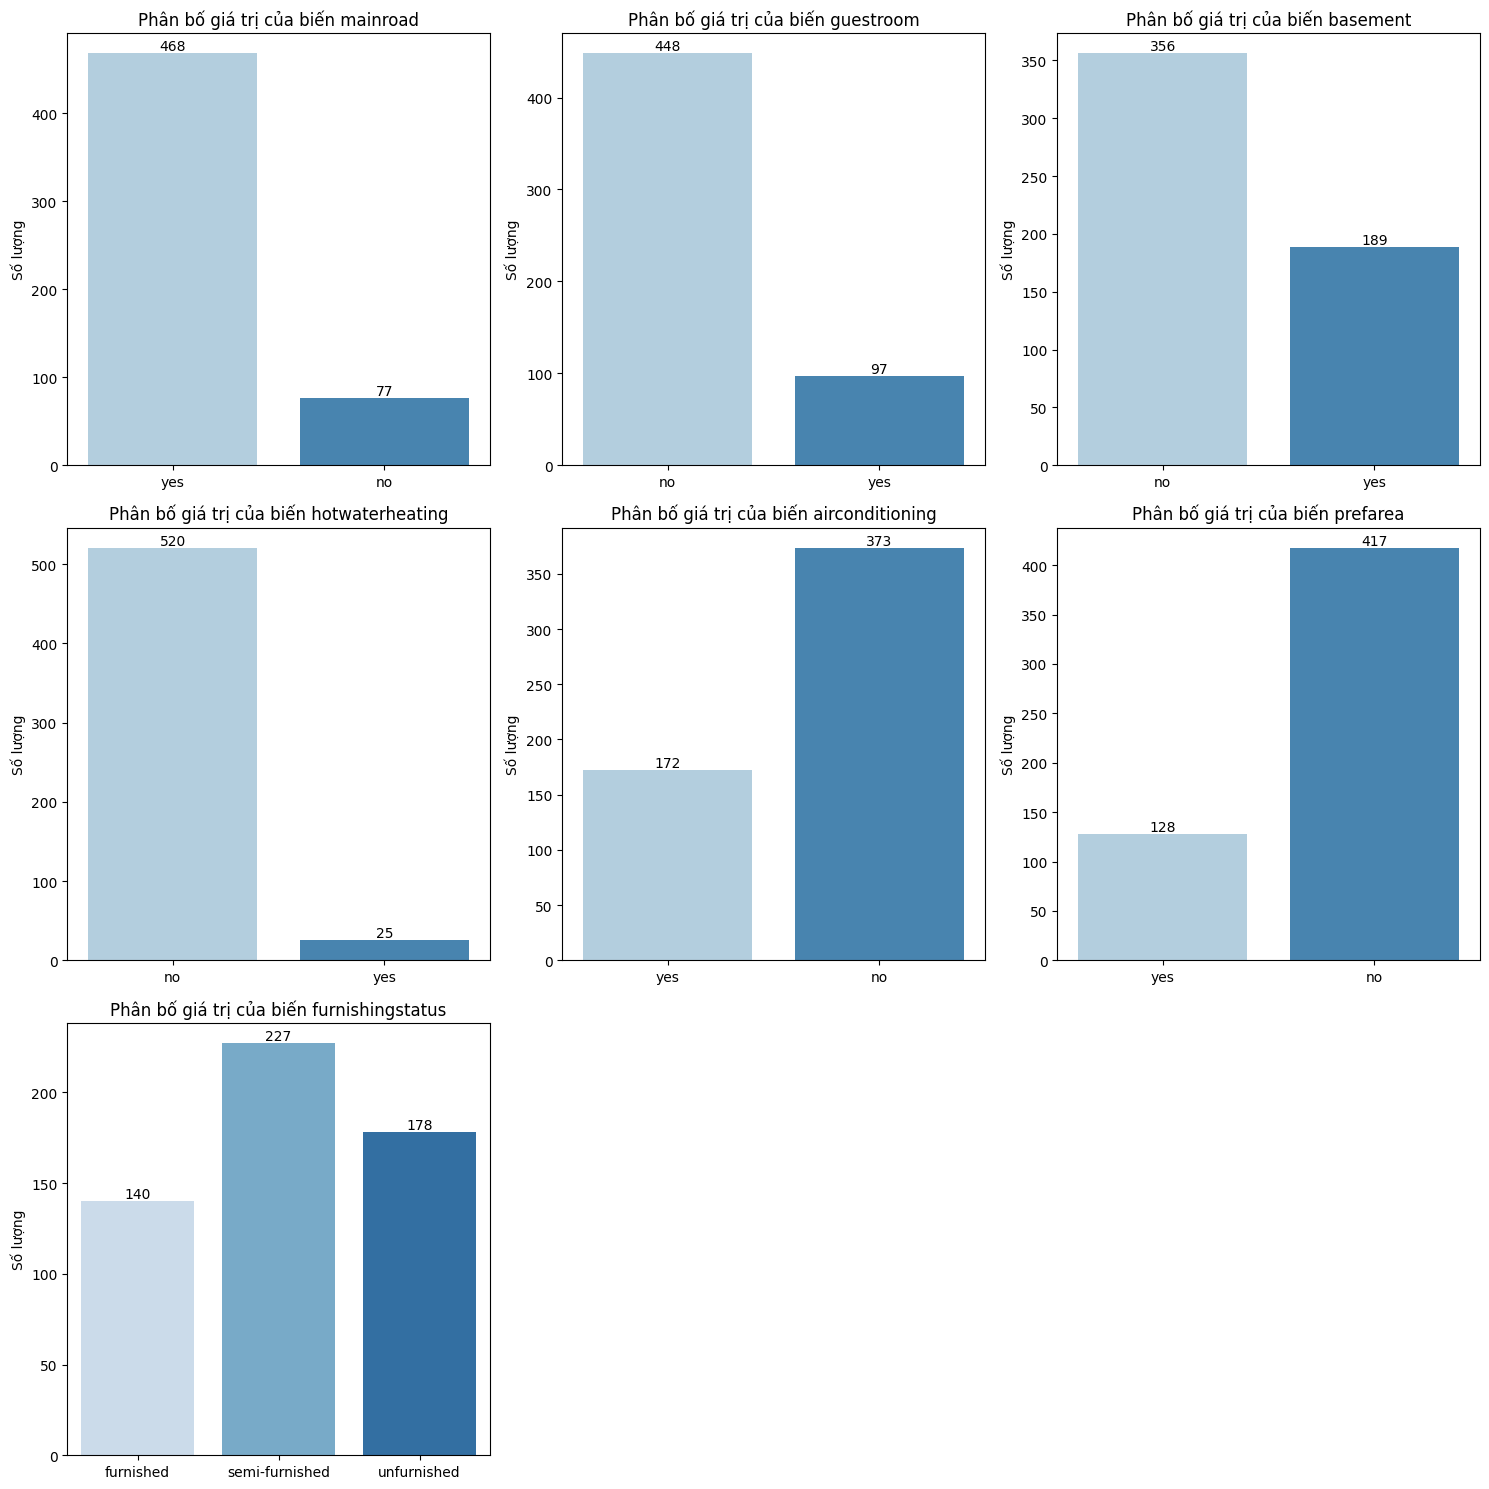

In [ ]:
plt.figure(figsize=(15, 15))

# Lặp qua từng biến phân loại để trực quan hóa
for i, col in enumerate(categorical_cols):
    ax = plt.subplot(3, 3, i + 1)

    # Vẽ biểu đồ cột thể hiện số lượng từng giá trị của biến
    sns.countplot(data=df_clipped, x=col, palette='Blues', ax=ax)

    # Thêm nhãn số lên đầu mỗi cột (patch)
    for p in ax.patches:
        count = int(p.get_height())
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height(),
            count,
            ha='center',
            va='bottom',
            fontsize=10
        )

    # Đặt tiêu đề và nhãn trục
    ax.set_title(f'Phân bố giá trị của biến {col}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Số lượng')

# Điều chỉnh layout để tránh chồng lấn
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

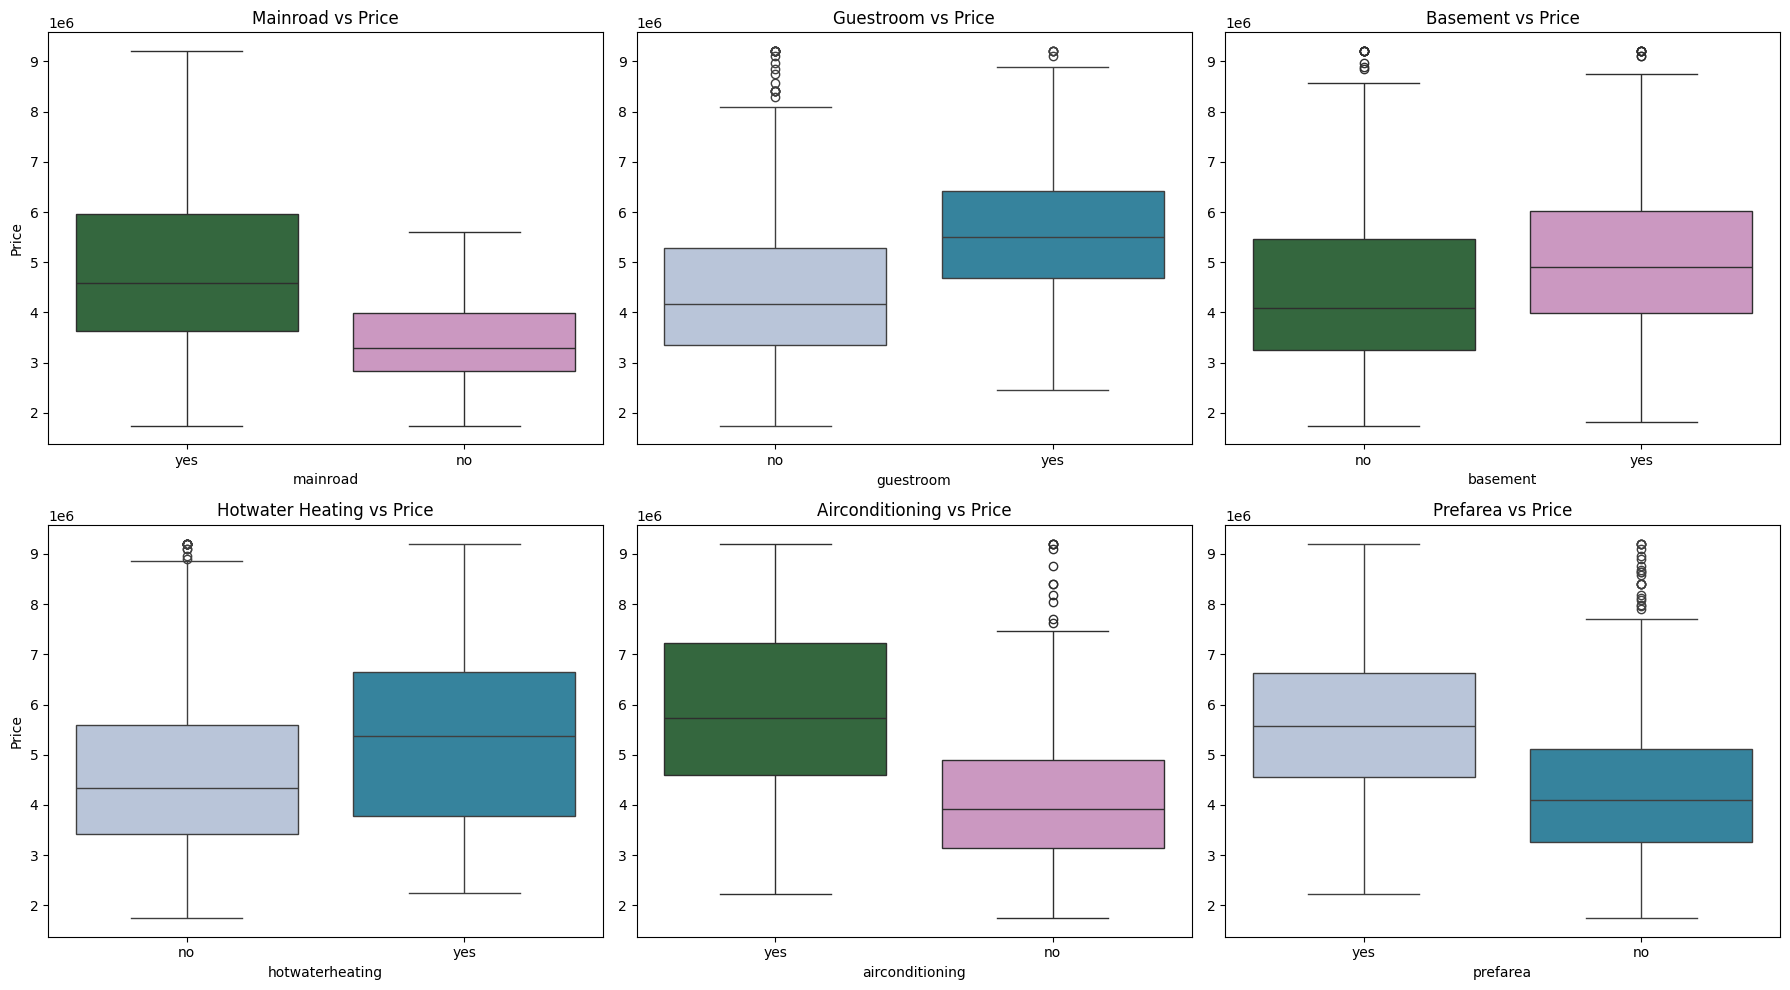

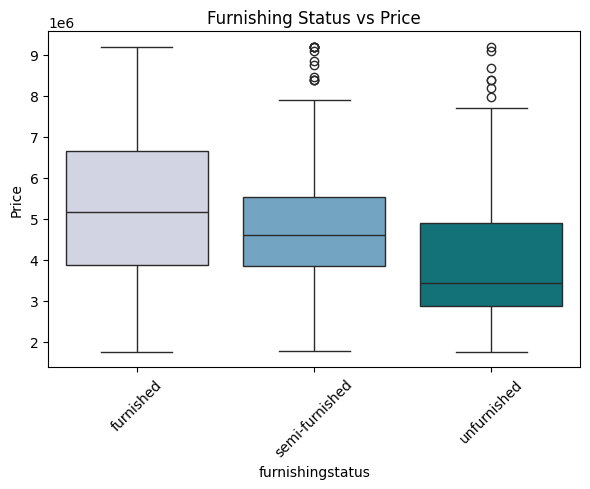

In [ ]:
# === Boxplot: Các biến phân loại so với Price ===

plt.figure(figsize=(18, 10))

# Biểu đồ 1: Mainroad
plt.subplot(2, 3, 1)
plt.title('Mainroad vs Price')
sns.boxplot(x=df_clipped.mainroad, y=df_clipped.price, palette="cubehelix")
plt.ylabel('Price')

# Biểu đồ 2: Guestroom
plt.subplot(2, 3, 2)
plt.title('Guestroom vs Price')
sns.boxplot(x=df_clipped.guestroom, y=df_clipped.price, palette="PuBuGn")
plt.ylabel('')

# Biểu đồ 3: Basement
plt.subplot(2, 3, 3)
plt.title('Basement vs Price')
sns.boxplot(x=df_clipped.basement, y=df_clipped.price, palette="cubehelix")
plt.ylabel('')

# Biểu đồ 4: Hotwaterheating
plt.subplot(2, 3, 4)
plt.title('Hotwater Heating vs Price')
sns.boxplot(x=df_clipped.hotwaterheating, y=df_clipped.price, palette="PuBuGn")
plt.ylabel('Price')

# Biểu đồ 5: Airconditioning
plt.subplot(2, 3, 5)
plt.title('Airconditioning vs Price')
sns.boxplot(x=df_clipped.airconditioning, y=df_clipped.price, palette="cubehelix")
plt.ylabel('')

# Biểu đồ 6: Prefarea
plt.subplot(2, 3, 6)
plt.title('Prefarea vs Price')
sns.boxplot(x=df_clipped.prefarea, y=df_clipped.price, palette="PuBuGn")
plt.ylabel('')

plt.tight_layout()
plt.show()

# === Biểu đồ Furnishingstatus riêng vì có nhiều nhãn hơn ===
plt.figure(figsize=(6, 5))
plt.title('Furnishing Status vs Price')
sns.boxplot(x=df_clipped.furnishingstatus, y=df_clipped.price, palette="PuBuGn")
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.tight_layout()
plt.show()


**Nhận xét:**
Các biểu đồ hộp cho thấy một số đặc điểm như gần đường chính, có phòng khách, điều hòa, nằm trong khu ưu tiên và nội thất đầy đủ có mối tương quan rõ rệt với giá nhà, khi giá trung bình của các nhà có những đặc điểm này đều cao hơn đáng kể.

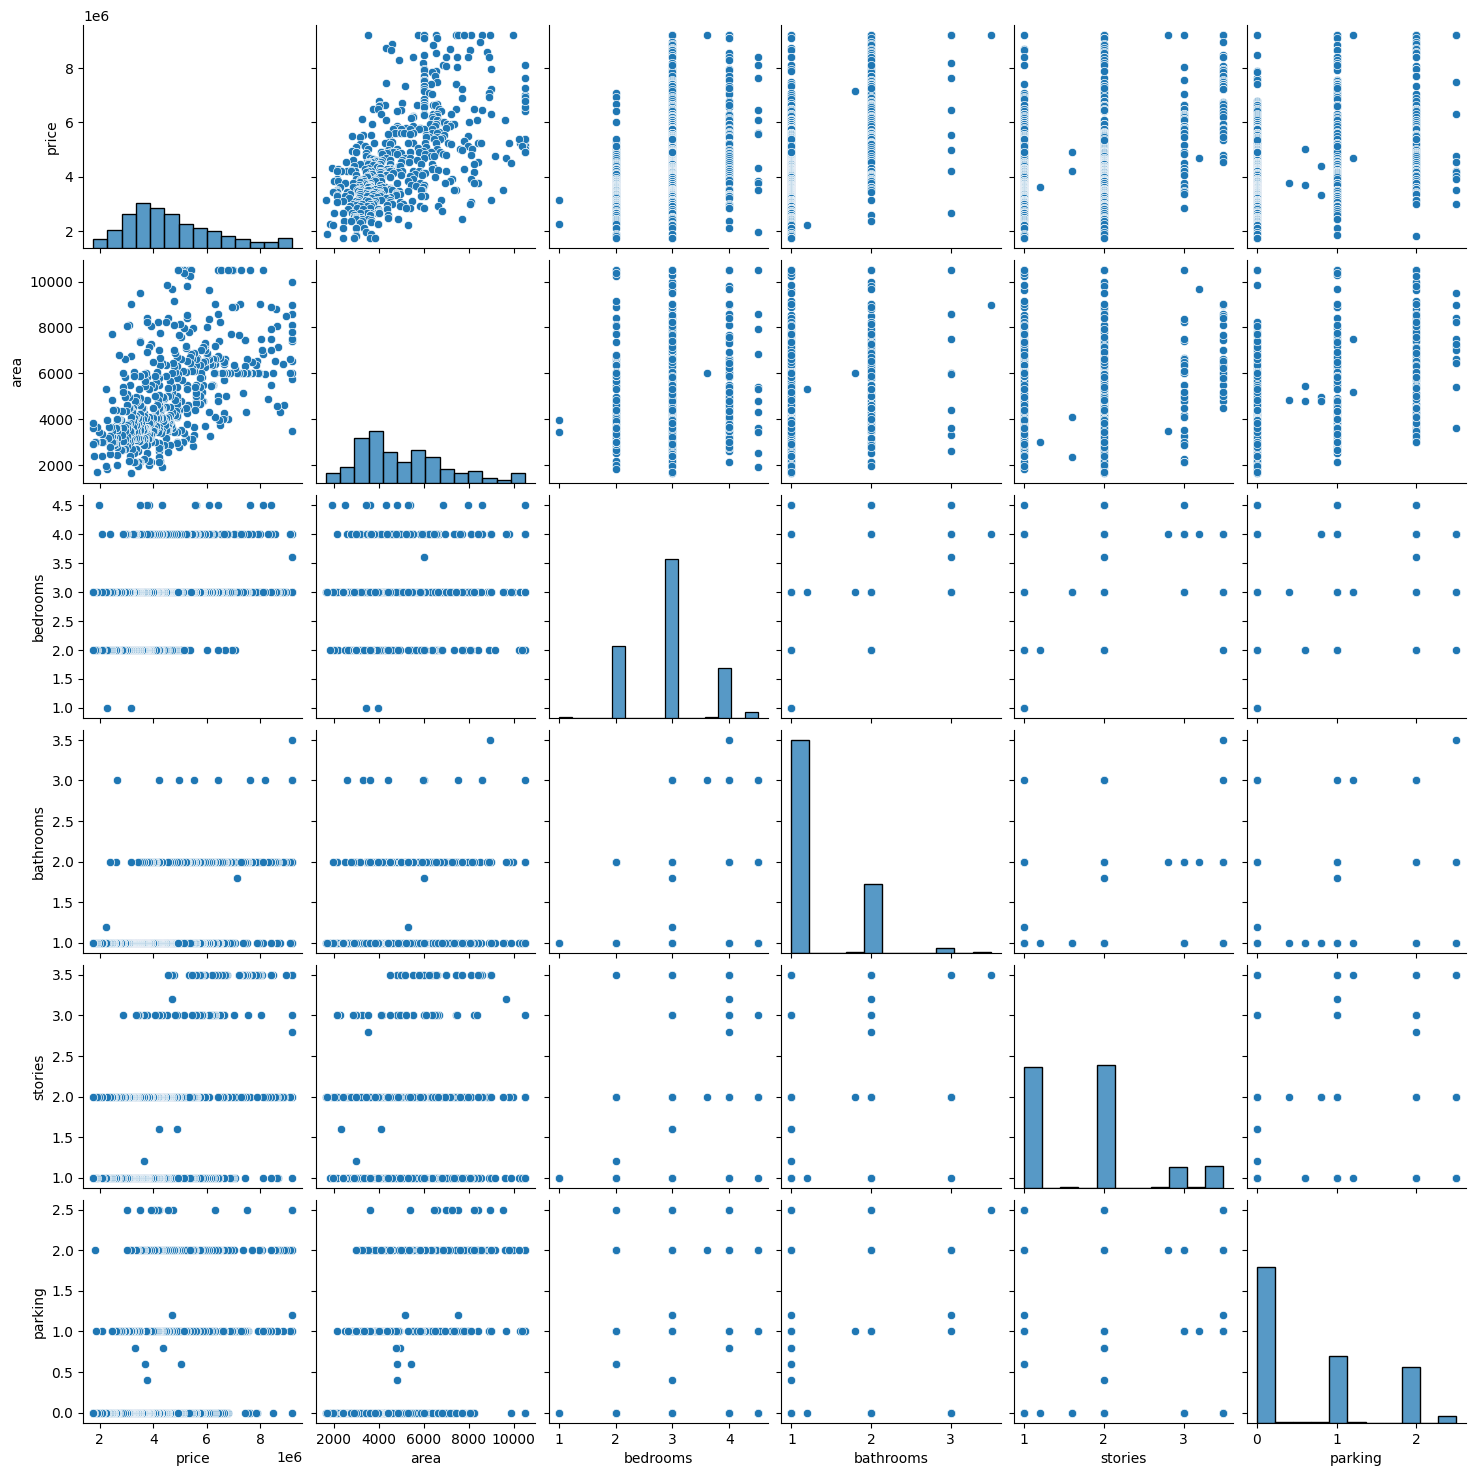

In [ ]:
# Vẽ biểu đồ ma trận (pairplot)
sns.pairplot(df_clipped)
plt.show()

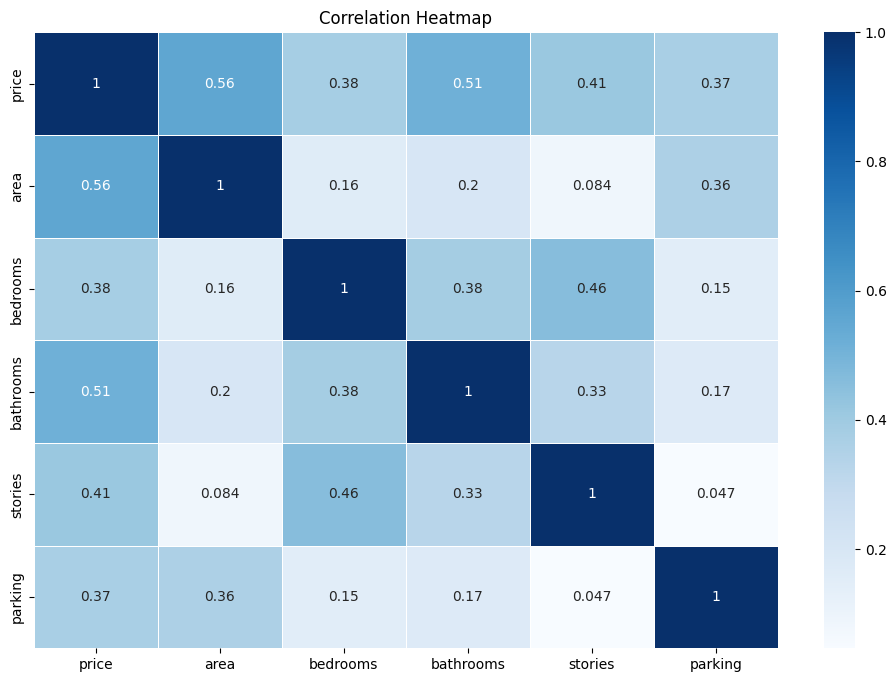

In [ ]:
# Tính toán ma trận tương quan giữa các biến số
cor_matrix = df_clipped[numerical_cols].corr()

plt.figure(figsize=(12, 8))

# Vẽ heatmap hiển thị hệ số tương quan
sns.heatmap(
    cor_matrix,
    annot=True,
    cmap='Blues',
    linewidths=0.5
)
plt.title('Correlation Heatmap')

# Hiển thị biểu đồ
plt.show()

**Nhận xét:**
- Diện tích có mối tương quan tích mạnh mẽ với Giá

# **Bước 5: Biến đổi dữ liệu**

**- Kiểm tra phân phối biến mục tiêu**

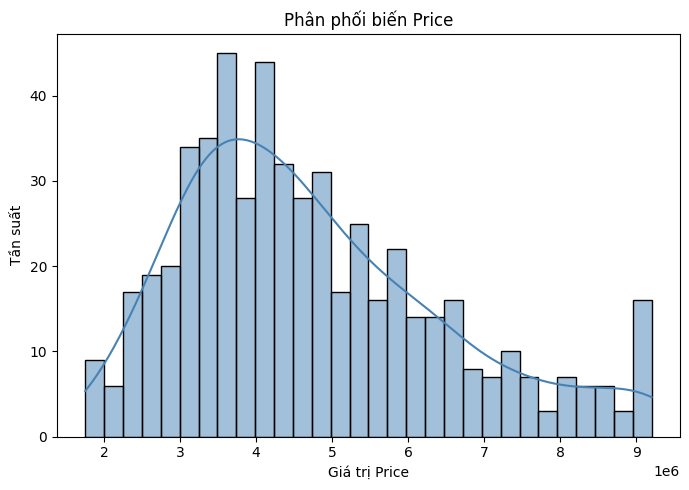

In [ ]:
# Tạo figure
plt.figure(figsize=(7, 5))

# Vẽ histogram thể hiện phân phối của biến 'price' với đường KDE (hàm mật độ nhân)
sns.histplot(
    df_clipped['price'],
    kde=True,
    bins=30,
    color='steelblue'
)

# Đặt tiêu đề
plt.title('Phân phối biến Price')

# Gán nhãn trục
plt.xlabel('Giá trị Price')
plt.ylabel('Tần suất')

# Căn chỉnh bố cục để không bị chồng chéo
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

**Nhận xét:**
- Phân phối lệch phải (right-skewed):
Biểu đồ cho thấy phần lớn giá nhà tập trung ở mức thấp đến trung bình, trong khi có một số ít ngôi nhà có giá rất cao (đuôi kéo dài bên phải). Điều này cho thấy phân phối bị lệch về phía phải — một đặc điểm phổ biến trong dữ liệu giá bất động sản.


In [ ]:
def analyze_skewness(df_clipped, column):
    data_clean = df_clipped[[column]].dropna().copy()

    # Tạo các biến transform
    data_clean['log'] = np.log(data_clean[column] + 1)
    data_clean['sqrt'] = np.sqrt(data_clean[column])
    data_clean['boxcox'], _ = stats.boxcox(data_clean[column][data_clean[column] > 0])

    # Yeo-Johnson (cho cả số 0 và âm nếu có)
    pt = PowerTransformer(method='yeo-johnson')
    data_clean['yeojohnson'] = pt.fit_transform(data_clean[[column]])

    # === Vẽ biểu đồ ===
    fig, ax = plt.subplots(2, 3, figsize=(18, 10))
    ax = ax.flatten()

    sns.histplot(data_clean[column], kde=True, ax=ax[0])
    ax[0].set_title('Original Distribution')

    sns.histplot(data_clean['log'], kde=True, ax=ax[1])
    ax[1].set_title('Log Transformation')

    sns.histplot(data_clean['sqrt'], kde=True, ax=ax[2])
    ax[2].set_title('Square Root Transformation')

    sns.histplot(data_clean['boxcox'], kde=True, ax=ax[3])
    ax[3].set_title('Box-Cox Transformation')

    sns.histplot(data_clean['yeojohnson'], kde=True, ax=ax[4])
    ax[4].set_title('Yeo-Johnson Transformation')


    ax[5].axis('off')

    plt.tight_layout()
    plt.show()

    # === In độ lệch Skewness ===
    print("=== Skewness Comparison (Phân phối lệch) ===")
    print(f"1. Original (Phân phối gốc):                  {data_clean[column].skew():.2f}")
    print(f"2. Log Transformation (Logarit tự nhiên):     {data_clean['log'].skew():.2f}")
    print(f"3. Square Root Transformation (Căn bậc hai):  {data_clean['sqrt'].skew():.2f}")
    print(f"4. Box-Cox Transformation:                    {pd.Series(data_clean['boxcox']).skew():.2f}")
    print(f"5. Yeo-Johnson Transformation:                {data_clean['yeojohnson'].skew():.2f}")



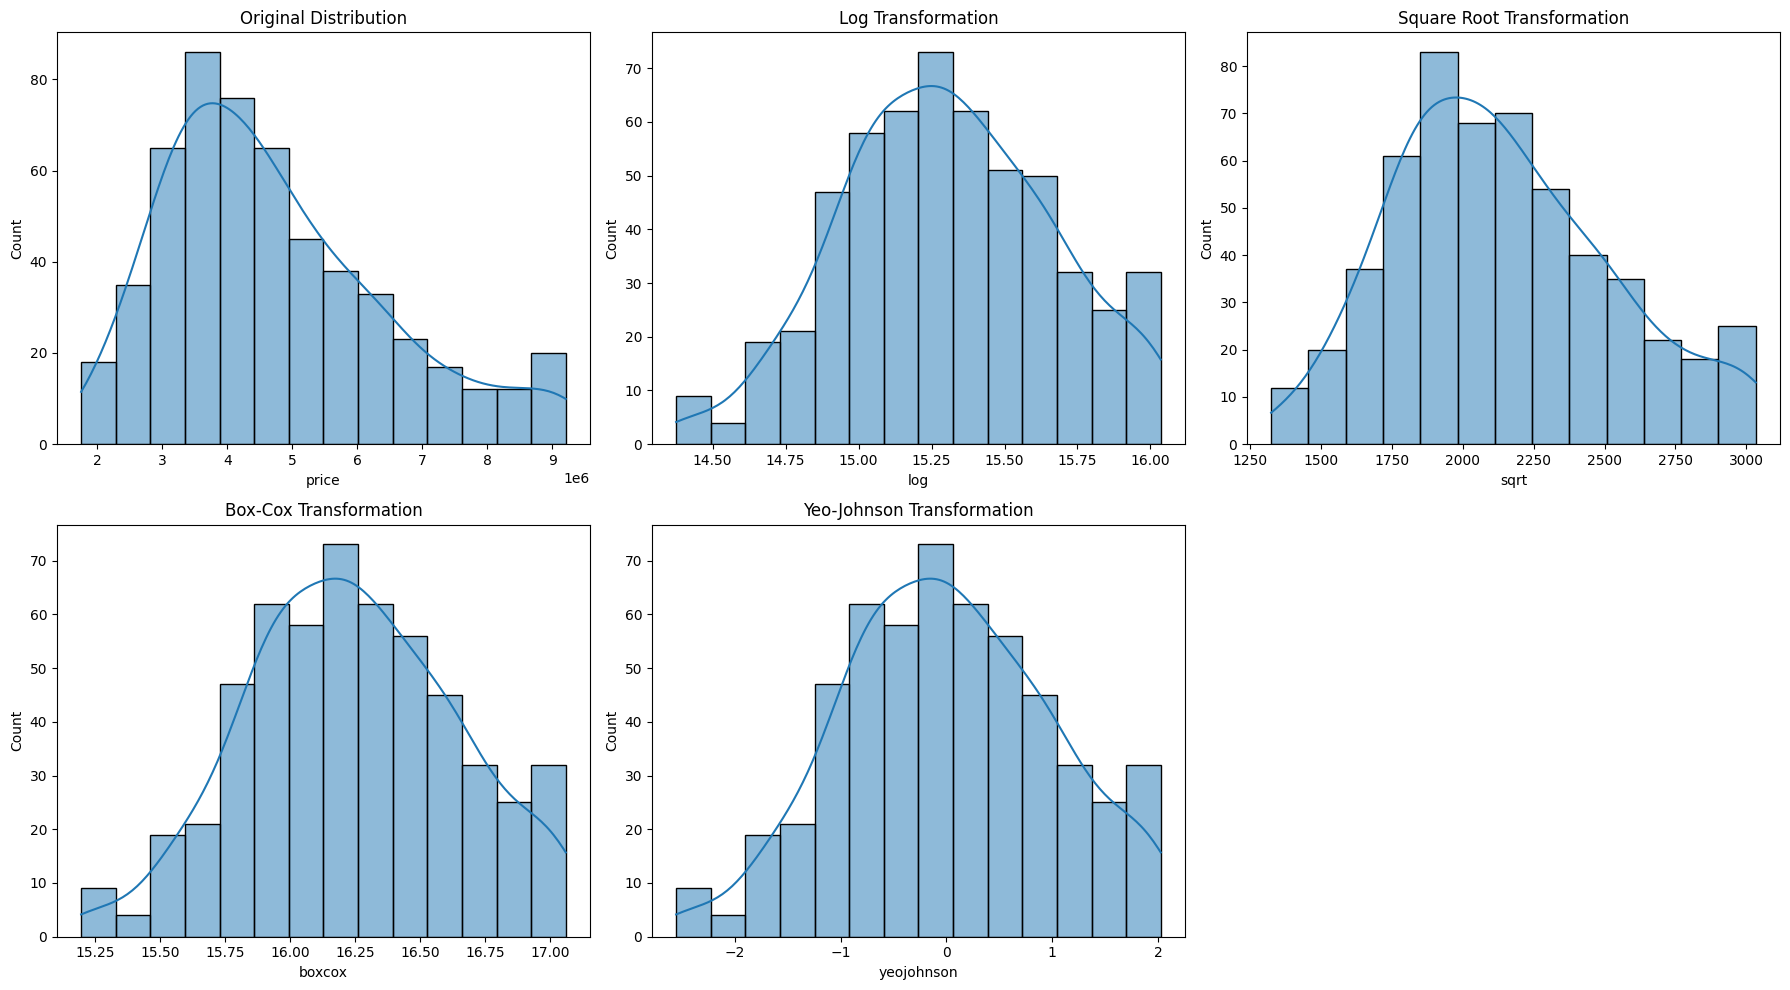

=== Skewness Comparison (Phân phối lệch) ===
1. Original (Phân phối gốc):                  0.79
2. Log Transformation (Logarit tự nhiên):     -0.01
3. Square Root Transformation (Căn bậc hai):  0.41
4. Box-Cox Transformation:                    -0.00
5. Yeo-Johnson Transformation:                -0.00


In [ ]:
analyze_skewness(df_clipped, 'price')

**Nhận xét:**
- Log Transformation: -0.01
=> Gần như chuẩn, đối xứng tốt, đỉnh tập trung rõ ràng.
- Square Root Transformation (Căn bậc hai):  0.41
 => Đỡ lệch hơn nhưng vẫn có đuôi phải.
- Box-Cox Transformation:                    -0.00
=> Gần chuẩn như log, thậm chí mượt hơn trong một số trường hợp.
- Yeo-Johnson Transformation:                -0.00
=> Hiệu quả tương đương Box-Cox, dùng được cả dữ liệu âm.

**Chọn phương pháp Log Transformation là** phương pháp tối ưu cho bài toán này, vì:

- Giảm độ lệch hiệu quả (skewness = 0.01, gần chuẩn).

- Đơn giản, dễ triển khai, và phù hợp với dữ liệu giá nhà (giá trị dương).

- Phù hợp với cả mô hình tuyến tính và phi tuyến, cải thiện dự đoán trên toàn bộ phạm vi giá trị.

- Được sử dụng rộng rãi trong các bài toán giá nhà, với hiệu quả đã được chứng minh.

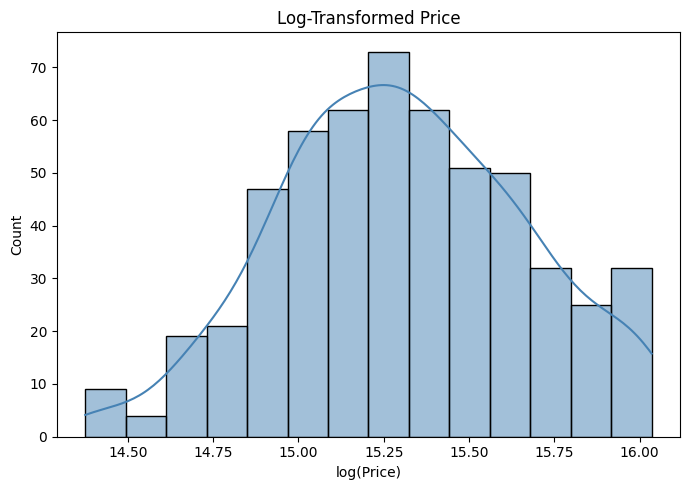

In [ ]:
# Thêm cột log-transformed vào df_log
df_log = df_clipped.copy()
df_log['price_log'] = np.log(df_log['price'])

# Kiểm tra phân phối sau biến đổi
plt.figure(figsize=(7, 5))
sns.histplot(df_log['price_log'], kde=True, color='steelblue')
plt.title('Log-Transformed Price')
plt.xlabel('log(Price)')
plt.tight_layout()
plt.show()

**- Mã hóa dữ liệu phân loại**

In [ ]:
# 1. Chuyển các biến phân loại nhị phân thành 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_log[col] = df_log[col].map({'yes': 1, 'no': 0, 'Yes': 1, 'No': 0})

# 2. Xử lý biến 'furnishingstatus' bằng mã hóa dummies
# Áp dụng dummies encoding
df_log = pd.get_dummies(df_log, columns=['furnishingstatus'], drop_first=True)

# Chuyển các cột boolean thành số nguyên (0/1)
boolean_cols = ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
for col in boolean_cols:
    df_log[col] = df_log[col].astype(int)

# Hiển thị 5 dòng đầu tiên của DataFrame
df_log.head()


,price,area,bedrooms,bathrooms,stories,parking,airconditioning,basement,prefarea,mainroad,guestroom,hotwaterheating,price_log,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000.0,7420,4.0,2.0,3.0,2.0,1,0,1,1,0,0,16.035257,0,0
1,9205000.0,8960,4.0,3.5,3.5,2.5,1,0,0,1,0,0,16.035257,0,0
2,9205000.0,9960,3.0,2.0,2.0,2.0,0,1,1,1,0,0,16.035257,1,0
3,9205000.0,7500,4.0,2.0,2.0,2.5,1,1,1,1,0,0,16.035257,0,0
4,9205000.0,7420,4.0,1.0,2.0,2.0,1,1,0,1,1,0,16.035257,0,0


**- Chuẩn hóa dữ liệu**

In [ ]:
# Chuẩn hóa đặc trưng cho tất cả các biến
# Xác định tất cả các đặc trưng cần chuẩn hóa
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
            'mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus_semi-furnished',
            'furnishingstatus_unfurnished']

# 1. StandardScaler (Chuẩn hóa Z-score)
scaler_std = StandardScaler()
df_log_std = df_log.copy()
df_log_std[features] = scaler_std.fit_transform(df_log[features])

# 2. MinMaxScaler (Chuẩn hóa về khoảng 0-1)
scaler_minmax = MinMaxScaler()
df_log_minmax = df_log.copy()
df_log_minmax[features] = scaler_minmax.fit_transform(df_log[features])

# 3. RobustScaler (Sử dụng trung vị và IQR, phù hợp với dữ liệu có ngoại lệ)
scaler_robust = RobustScaler()
df_log_robust = df_log.copy()
df_log_robust[features] = scaler_robust.fit_transform(df_log[features])

# So sánh các thuộc tính thống kê của dữ liệu đã chuẩn hóa
print("\nThống kê StandardScaler:")
df_log_std[features].describe().loc[['mean', 'std']].round(3)


Thống kê StandardScaler:


,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
mean,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001


In [ ]:
print("\nThống kê MinMaxScaler:")
df_log_minmax[features].describe().loc[['min', 'max']].round(3)


Thống kê MinMaxScaler:


,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
print("\nThống kê RobustScaler:")
df_log_robust[features].describe().round(3)


Thống kê RobustScaler:


,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,545.000,545.000,545.000,545.000,545.000,545.000,545.000,545.000,545.000,545.000,545.000,545.000,545.000
mean,0.182,-0.050,0.283,-0.231,0.686,-0.141,0.178,0.347,0.046,0.316,0.235,0.417,0.327
std,0.727,0.697,0.497,0.781,0.829,0.349,0.383,0.476,0.209,0.465,0.424,0.493,0.469
min,-1.069,-2.000,0.000,-1.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.362,-1.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.638,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000
max,2.138,1.500,2.500,1.500,2.500,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


**Nhận xét:**

**1. StandardScaler:**

- Mean ≈ 0, Std ≈ 1 ⇒ phân phối đúng chuẩn.

**2. MinMaxScaler:**

- Dữ liệu bị nén mạnh về khoảng [0, 1].

- Rất dễ méo mó nếu có chỉ vài giá trị lớn, như area hoặc bathrooms có giá trị cực đại bất thường → ảnh hưởng toàn bộ scale.

**3. RobustScaler:**

- Median = 0, IQR = 1 (tức là dữ liệu phân bố quanh trung vị, ổn định).

- Biến bathrooms hoặc parking có vẻ có một số giá trị lớn (như bathrooms lên đến 2.5) nhưng vẫn không làm lệch toàn bộ phân phối.

=> Đối với bài toán dự đoán giá nhà, StandardScaler có thể hoạt động tốt vì hồi quy tuyến tính thường giả định các đặc điểm phân phối chuẩn

In [ ]:
# Chuẩn hóa toàn bộ biến
scaler_std = StandardScaler()
df_std = df_log.copy()
df_std[features] = scaler_std.fit_transform(df_log[features])

# Hiển thị 5 dòng đầu
print("Sau khi áp dụng StandardScaler cho tất cả biến:")
df_std[features].head()

Sau khi áp dụng StandardScaler cho tất cả biến:


,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.156583,1.509085,1.444301,1.577414,1.586934,0.405623,-0.465315,-0.728628,-0.219265,1.472618,1.804941,-0.844888,-0.696429
1,1.925060,1.509085,4.467901,2.217923,2.190563,0.405623,-0.465315,-0.728628,-0.219265,1.472618,-0.554035,-0.844888,-0.696429
2,2.424072,0.072238,1.444301,0.296397,1.586934,0.405623,-0.465315,1.372442,-0.219265,-0.679063,1.804941,1.183588,-0.696429
3,1.196504,1.509085,1.444301,0.296397,2.190563,0.405623,-0.465315,1.372442,-0.219265,1.472618,1.804941,-0.844888,-0.696429
4,1.156583,1.509085,-0.571433,0.296397,1.586934,0.405623,2.149083,1.372442,-0.219265,1.472618,-0.554035,-0.844888,-0.696429


# **Bước 6: Thu giảm dữ liệu**

**- Kiểm tra đa cộng tuyến**

In [ ]:
# Bỏ cột 'price' và 'price_log' vì chúng là biến mục tiêu, chỉ giữ các biến đầu vào
X = df_std.drop(['price', 'price_log'], axis=1)

# Tạo DataFrame để lưu kết quả VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# VIF > 5 hoặc > 10 thường cho thấy đa cộng tuyến nghiêm trọng giữa các biến

# In ra danh sách các biến và hệ số VIF tương ứng, sắp xếp theo giá trị VIF giảm dần
print(" Hệ số VIF (Variance Inflation Factor):")
print(vif_data.sort_values("VIF", ascending=False))

 Hệ số VIF (Variance Inflation Factor):
                            Feature       VIF
12     furnishingstatus_unfurnished  1.676785
11  furnishingstatus_semi-furnished  1.580599
3                           stories  1.512918
1                          bedrooms  1.458371
0                              area  1.365287
6                          basement  1.305193
2                         bathrooms  1.279021
4                           parking  1.223903
9                         guestroom  1.211555
5                   airconditioning  1.205716
8                          mainroad  1.181868
7                          prefarea  1.158430
10                  hotwaterheating  1.045219


**Nhận xét:**

**- Không có vấn đề đa cộng tuyến nghiêm trọng:**

Tất cả các giá trị VIF đều dưới 2, thấp hơn nhiều so với ngưỡng thông thường 5-10, điều này cho thấy không có vấn đề đáng lo ngại.

**- Tính độc lập của các đặc trưng:**
Các biến dự báo thể hiện sự độc lập tương đối với nhau, điều này là lý tưởng để ước lượng hệ số một cách tin cậy.

**- Giảm chiều dữ liệu bằng PCA**

Số chiều sau khi giảm: 12


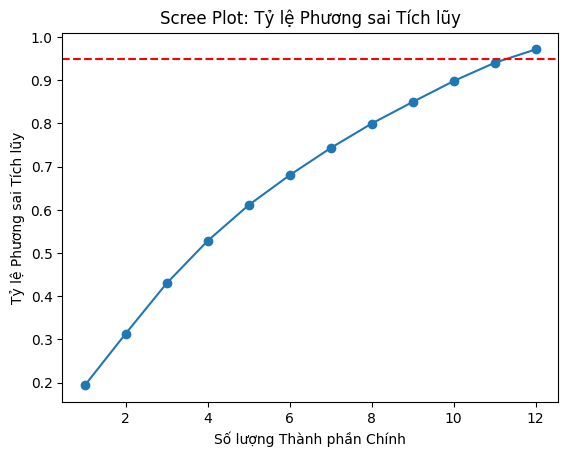

In [ ]:

# Chạy PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(df_std[features])
print(f"Số chiều sau khi giảm: {X_pca.shape[1]}")

# Vẽ Scree Plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Số lượng Thành phần Chính')
plt.ylabel('Tỷ lệ Phương sai Tích lũy')
plt.title('Scree Plot: Tỷ lệ Phương sai Tích lũy')
plt.show()

**Nhận xét:**

Biểu đồ cho thấy tỷ lệ phương sai tích lũy (cumulative variance ratio) tăng dần theo số lượng thành phần chính (principal components). Với 12 thành phần chính, tỷ lệ phương sai tích lũy đạt 0.95 (95%).

**- Trích chọn đặc trưng quan trọng bằng RandomForest**

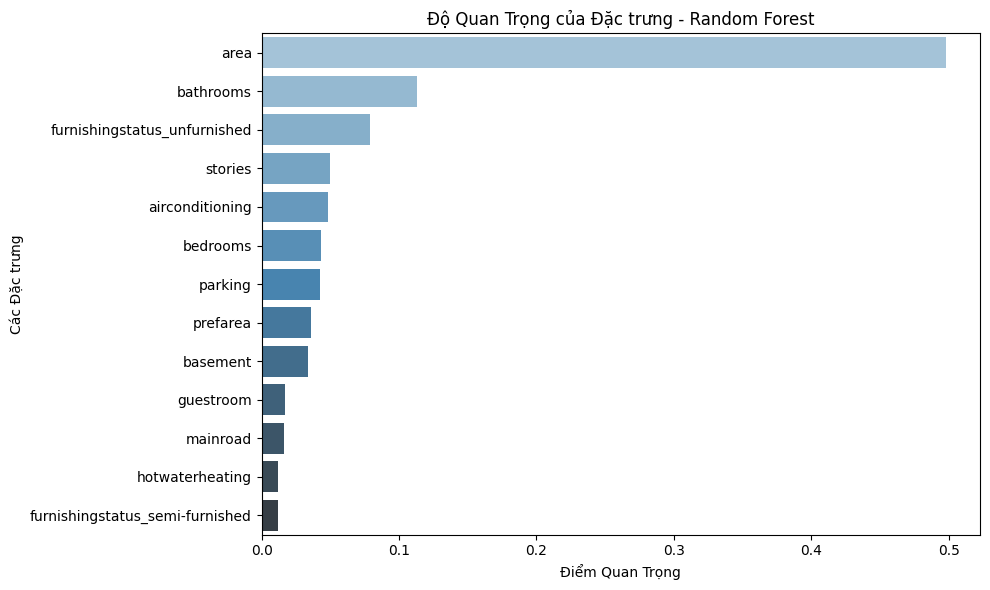

In [ ]:
# Trích chọn dữ liệu đầu vào và đầu ra
X_feature_selection = df_std.drop(columns=['price', 'price_log'])
y_feature_selection = df_std['price_log']

# Huấn luyện mô hình Random Forest để trích chọn đặc trưng
model_feature_selection = RandomForestRegressor(n_estimators=100, random_state=42)
model_feature_selection.fit(X_feature_selection, y_feature_selection)

# Lấy và sắp xếp độ quan trọng của các đặc trưng
feature_importance_scores = pd.Series(model_feature_selection.feature_importances_, index=X_feature_selection.columns)
feature_importance_scores = feature_importance_scores.sort_values(ascending=False)

# Vẽ biểu đồ thể hiện độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_scores.values, y=feature_importance_scores.index, palette='Blues_d')
plt.title("Độ Quan Trọng của Đặc trưng - Random Forest")
plt.xlabel("Điểm Quan Trọng")
plt.ylabel("Các Đặc trưng")
plt.tight_layout()
plt.show()

**Nhận xét:**

**1. Đặc trưng quan trọng nhất:**

area (diện tích) và bathrooms (số phòng tắm) là hai đặc trưng quan trọng nhất, lần lượt chiếm ~0.48 và ~0.18 độ quan trọng. Đây là các yếu tố chính ảnh hưởng đến giá nhà (price_log).

**2. Đặc trưng phụ:**

furnishingstatus_unfurnished, stories, airconditioning, bedrooms, và parking có ảnh hưởng, nhưng mức độ thấp hơn (<0.1).

**3. Đặc trưng không quan trọng:**

prefarea, basement, guestroom, mainroad, hotwaterheating, và furnishingstatus_semi-furnished có độ quan trọng rất thấp (<0.03), gần như không ảnh hưởng đến dự đoán.

**4. Hiệu quả trích chọn đặc trưng:**

Random Forest đã xác định rõ các đặc trưng quan trọng, phù hợp để giảm chiều nếu cần.

Tuy nhiên, với 13 đặc trưng ban đầu, việc giảm chiều không mang lại lợi ích lớn về mặt tính toán.

# **Bước 7: Xây dựng mô hình**

In [ ]:
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    float64
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    float64
 3   bathrooms                        545 non-null    float64
 4   stories                          545 non-null    float64
 5   parking                          545 non-null    float64
 6   airconditioning                  545 non-null    float64
 7   basement                         545 non-null    float64
 8   prefarea                         545 non-null    float64
 9   mainroad                         545 non-null    float64
 10  guestroom                        545 non-null    float64
 11  hotwaterheating                  545 non-null    float64
 12  price_log             

In [ ]:
# === 1. Tách biến đầu vào (X) và biến mục tiêu (y) ===
X = df_std.drop(columns=['price_log', 'price'])
y = df_std['price_log']

# === 2. Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra ===
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 3. Khởi tạo và huấn luyện mô hình hồi quy tuyến tính ===
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# === 4. Dự đoán giá trị đầu ra trên tập kiểm tra ===
y_pred = lr_model.predict(X_test)

# === 5. Đánh giá hiệu suất mô hình ===
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)               # Hệ số xác định R²
mae = mean_absolute_error(y_test, y_pred)   # Sai số tuyệt đối trung bình
mse = mean_squared_error(y_test, y_pred)    # Sai số bình phương trung bình
rmse = np.sqrt(mse)                         # Căn bậc hai của MSE

# === 6. In kết quả ra màn hình ===
print(f"R² Score (Hệ số xác định): {r2:.4f}")
print(f"MAE (Sai số tuyệt đối trung bình): {mae:.4f}")
print(f"MSE (Sai số bình phương trung bình): {mse:.4f}")
print(f"RMSE (Sai số căn bậc hai): {rmse:.4f}")


R² Score (Hệ số xác định): 0.6568
MAE (Sai số tuyệt đối trung bình): 0.1959
MSE (Sai số bình phương trung bình): 0.0608
RMSE (Sai số căn bậc hai): 0.2466


Text(0, 0.5, 'y_pred')

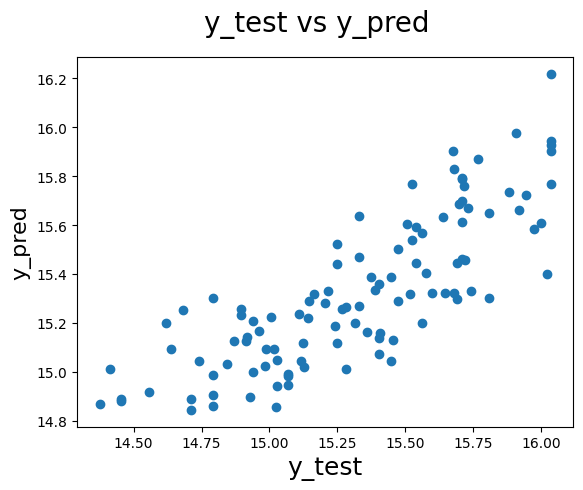

In [ ]:
#ĐÁNH GIÁ MÔ HÌNH
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

**Nhận xét:** Kết quả huấn luyện mô hình hồi quy tuyến tính (Linear Regression) để dự đoán giá nhà (price_log) cho thấy các chỉ số hiệu suất như sau:

- R² Score (Hệ số xác định): Đạt 0.6568, nghĩa là mô hình giải thích được khoảng 65.68% phương sai của biến mục tiêu (price_log). Đây là một kết quả khá tốt, cho thấy mô hình có khả năng dự đoán giá nhà ở mức chấp nhận được, nhưng vẫn còn khoảng 34.32% phương sai chưa được giải thích, có thể do các yếu tố chưa được xem xét trong dữ liệu hoặc hạn chế của mô hình tuyến tính khi xử lý mối quan hệ phi tuyến.

- MAE (Sai số tuyệt đối trung bình): 0.1959, nghĩa là sai số trung bình giữa giá trị dự đoán và thực tế (trên thang logarit) là khoảng 0.1959. Giá trị này cho thấy mô hình có độ chính xác tương đối cao, nhưng sai số vẫn đáng kể, đặc biệt khi chuyển đổi ngược từ price_log về giá trị gốc, sai số này có thể được khuếch đại do tính chất của phép biến đổi logarit.

- MSE (Sai số bình phương trung bình): 0.0608, cho thấy sai số bình phương trung bình giữa giá trị dự đoán và thực tế ở mức thấp. Tuy nhiên, chỉ số này nhạy cảm với các sai số lớn, nên cần xem xét thêm các chỉ số khác để đánh giá toàn diện.

- RMSE (Sai số căn bậc hai trung bình): 0.2466, tương đối gần với MAE (0.1959), cho thấy không có nhiều sai số lớn bất thường trong dự đoán. RMSE cũng ở mức chấp nhận được, nhưng tương tự MAE, khi chuyển đổi ngược về giá trị gốc, sai số này có thể lớn hơn đáng kể.